    age    bp     sg   sc    bgr    bu    sod  pot  hemo    wbcc  rbcc  htn  \
0  48.0  80.0  1.020  1.2  121.0  36.0    NaN  NaN  15.4  7800.0   5.2  yes   
1   7.0  50.0  1.020  0.8    NaN  18.0    NaN  NaN  11.3  6000.0   NaN   no   
2  62.0  80.0  1.010  1.8  423.0  53.0    NaN  NaN   9.6  7500.0   NaN   no   
3  48.0  70.0  1.005  3.8  117.0  56.0  111.0  2.5  11.2  6700.0   3.9  yes   
4  51.0  80.0  1.010  1.4  106.0  26.0    NaN  NaN  11.6  7300.0   4.6   no   

    dm   pe  ane class  
0  yes   no   no   ckd  
1   no   no   no   ckd  
2  yes   no  yes   ckd  
3   no  yes  yes   ckd  
4   no   no   no   ckd  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   sc      383 non-null    float64
 4   bgr     356 non-null    float64
 5   bu    

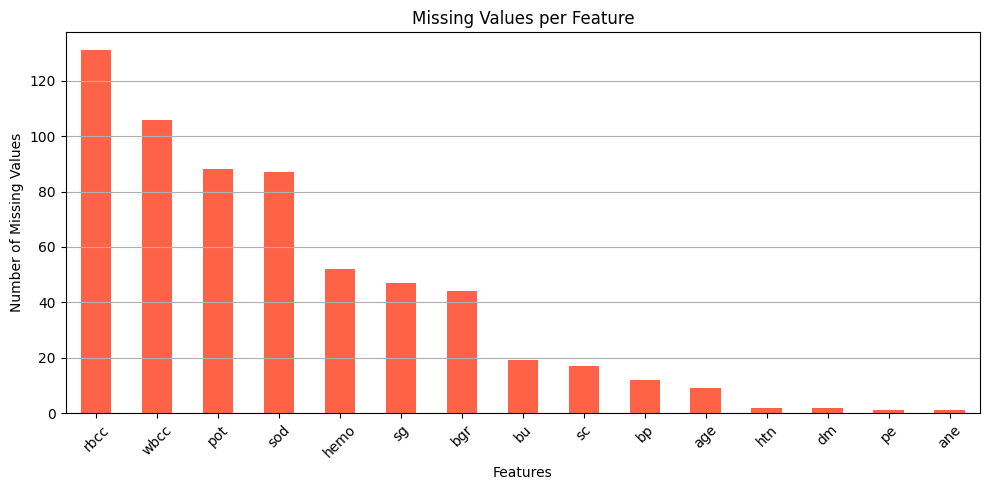

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\dataset\\ckd_data.csv")

# Display first 5 rows
print(df.head())

# Summary of dataset
print(df.info())

# Count missing values
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print(missing_counts)

# Visualize missing data
missing_counts.plot(kind='bar', figsize=(10,5), color='tomato')
plt.title("Missing Values per Feature")
plt.ylabel("Number of Missing Values")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\dataset\\ckd_data.csv", na_values="?")

# Identify numerical and categorical columns
numerical_cols = ["age","sg", "bp", "bgr", "bu", "sc", "sod", "pot", "hemo", "wbcc", "rbcc"]
categorical_cols = ["htn", "dm", "pe", "ane", "class"]

# Encode categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("Categorical encoding completed.")

# Labels were reversed: 1 = not CKD, 0 = CKD
# Fixed at inference by flipping output
df['class'] = df['class'].map({0: 1, 1: 0})  # Now 1 = CKD, 0 = Not CKD


# Fill missing values for numerical columns with mean
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing values for categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values are handled
print(df.isnull().sum())
print(df.head())


Categorical encoding completed.
age      0
bp       0
sg       0
sc       0
bgr      0
bu       0
sod      0
pot      0
hemo     0
wbcc     0
rbcc     0
htn      0
dm       0
pe       0
ane      0
class    0
dtype: int64
    age    bp     sg   sc         bgr    bu         sod       pot  hemo  \
0  48.0  80.0  1.020  1.2  121.000000  36.0  137.528754  4.627244  15.4   
1   7.0  50.0  1.020  0.8  148.036517  18.0  137.528754  4.627244  11.3   
2  62.0  80.0  1.010  1.8  423.000000  53.0  137.528754  4.627244   9.6   
3  48.0  70.0  1.005  3.8  117.000000  56.0  111.000000  2.500000  11.2   
4  51.0  80.0  1.010  1.4  106.000000  26.0  137.528754  4.627244  11.6   

     wbcc      rbcc  htn  dm  pe  ane  class  
0  7800.0  5.200000    1   1   0    0      1  
1  6000.0  4.707435    0   0   0    0      1  
2  7500.0  4.707435    0   1   0    1      1  
3  6700.0  3.900000    1   0   1    1      1  
4  7300.0  4.600000    0   0   0    0      1  


In [3]:
df.to_csv("C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\dataset/ckd_cleaned.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.
